**_Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set_**

**_File: breast_cancer_dataset.csv_**

**_Dataset details: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data_**

## **_Breast Cancer Diagnosis_**

### **_Setup_**

In [1]:
%pip install -q numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### **_Configurations_**

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_theme(style='darkgrid')
RANDOM_STATE=42

In [4]:
df = pd.read_csv('../data/breast_cancer.csv')

In [5]:
df.shape

(569, 32)

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [7]:
df = df.drop(columns=['id'])

#### **_Exploratory Data Analysis_**

In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='str')

In [9]:
# check presence of missing values

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    str    
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  569 non-null

In [11]:
# check if there any encoded missing values - top repeated values

for col in df.columns:
    print(col)
    print(df[col].value_counts().head(10))

diagnosis
diagnosis
B    357
M    212
Name: count, dtype: int64
radius_mean
radius_mean
12.340    4
13.000    3
12.460    3
13.170    3
13.050    3
12.180    3
11.600    3
13.850    3
15.460    3
12.770    3
Name: count, dtype: int64
texture_mean
texture_mean
15.700    3
16.840    3
19.830    3
20.520    3
18.220    3
14.930    3
17.460    3
18.900    3
16.850    3
21.250    2
Name: count, dtype: int64
perimeter_mean
perimeter_mean
82.610     3
87.760     3
134.700    3
132.900    2
130.000    2
132.400    2
103.700    2
102.500    2
102.400    2
87.320     2
Name: count, dtype: int64
area_mean
area_mean
512.200     3
658.800     2
684.500     2
520.000     2
559.200     2
1076.000    2
561.000     2
394.100     2
506.300     2
1075.000    2
Name: count, dtype: int64
smoothness_mean
smoothness_mean
0.101    5
0.107    4
0.105    4
0.115    4
0.110    3
0.117    3
0.098    3
0.102    3
0.108    3
0.110    3
Name: count, dtype: int64
compactness_mean
compactness_mean
0.121    3
0.115    

In [12]:
# identify duplicate rows

duplicate_mask = df.duplicated()
num_duplicates = duplicate_mask.sum()

print(f'Number of duplicate rows: {num_duplicates}')
print(f'Duplicates rows:\n {df[duplicate_mask]}')

Number of duplicate rows: 0
Duplicates rows:
 Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []


In [13]:
# class distribution

print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [14]:
print(df['diagnosis'].value_counts(normalize=True)*100)

diagnosis
B   62.742
M   37.258
Name: proportion, dtype: float64


In [15]:
# encode categorical columns

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [16]:
print(df['diagnosis'].value_counts(normalize=True)*100)

diagnosis
0   62.742
1   37.258
Name: proportion, dtype: float64


In [17]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.147,17.915,78.075,462.790,0.092,0.080,0.046,0.026,0.174,0.063,0.284,1.220,2.000,21.135,0.007,0.021,0.026,0.010,0.021,0.004,13.380,23.515,87.006,558.899,0.125,0.183,0.166,0.074,0.270,0.079
1,17.463,21.605,115.365,978.376,0.103,0.145,0.161,0.088,0.193,0.063,0.609,1.211,4.324,72.672,0.007,0.032,0.042,0.015,0.020,0.004,21.135,29.318,141.370,1422.286,0.145,0.375,0.451,0.182,0.323,0.092


#### **_Data Visualization_**

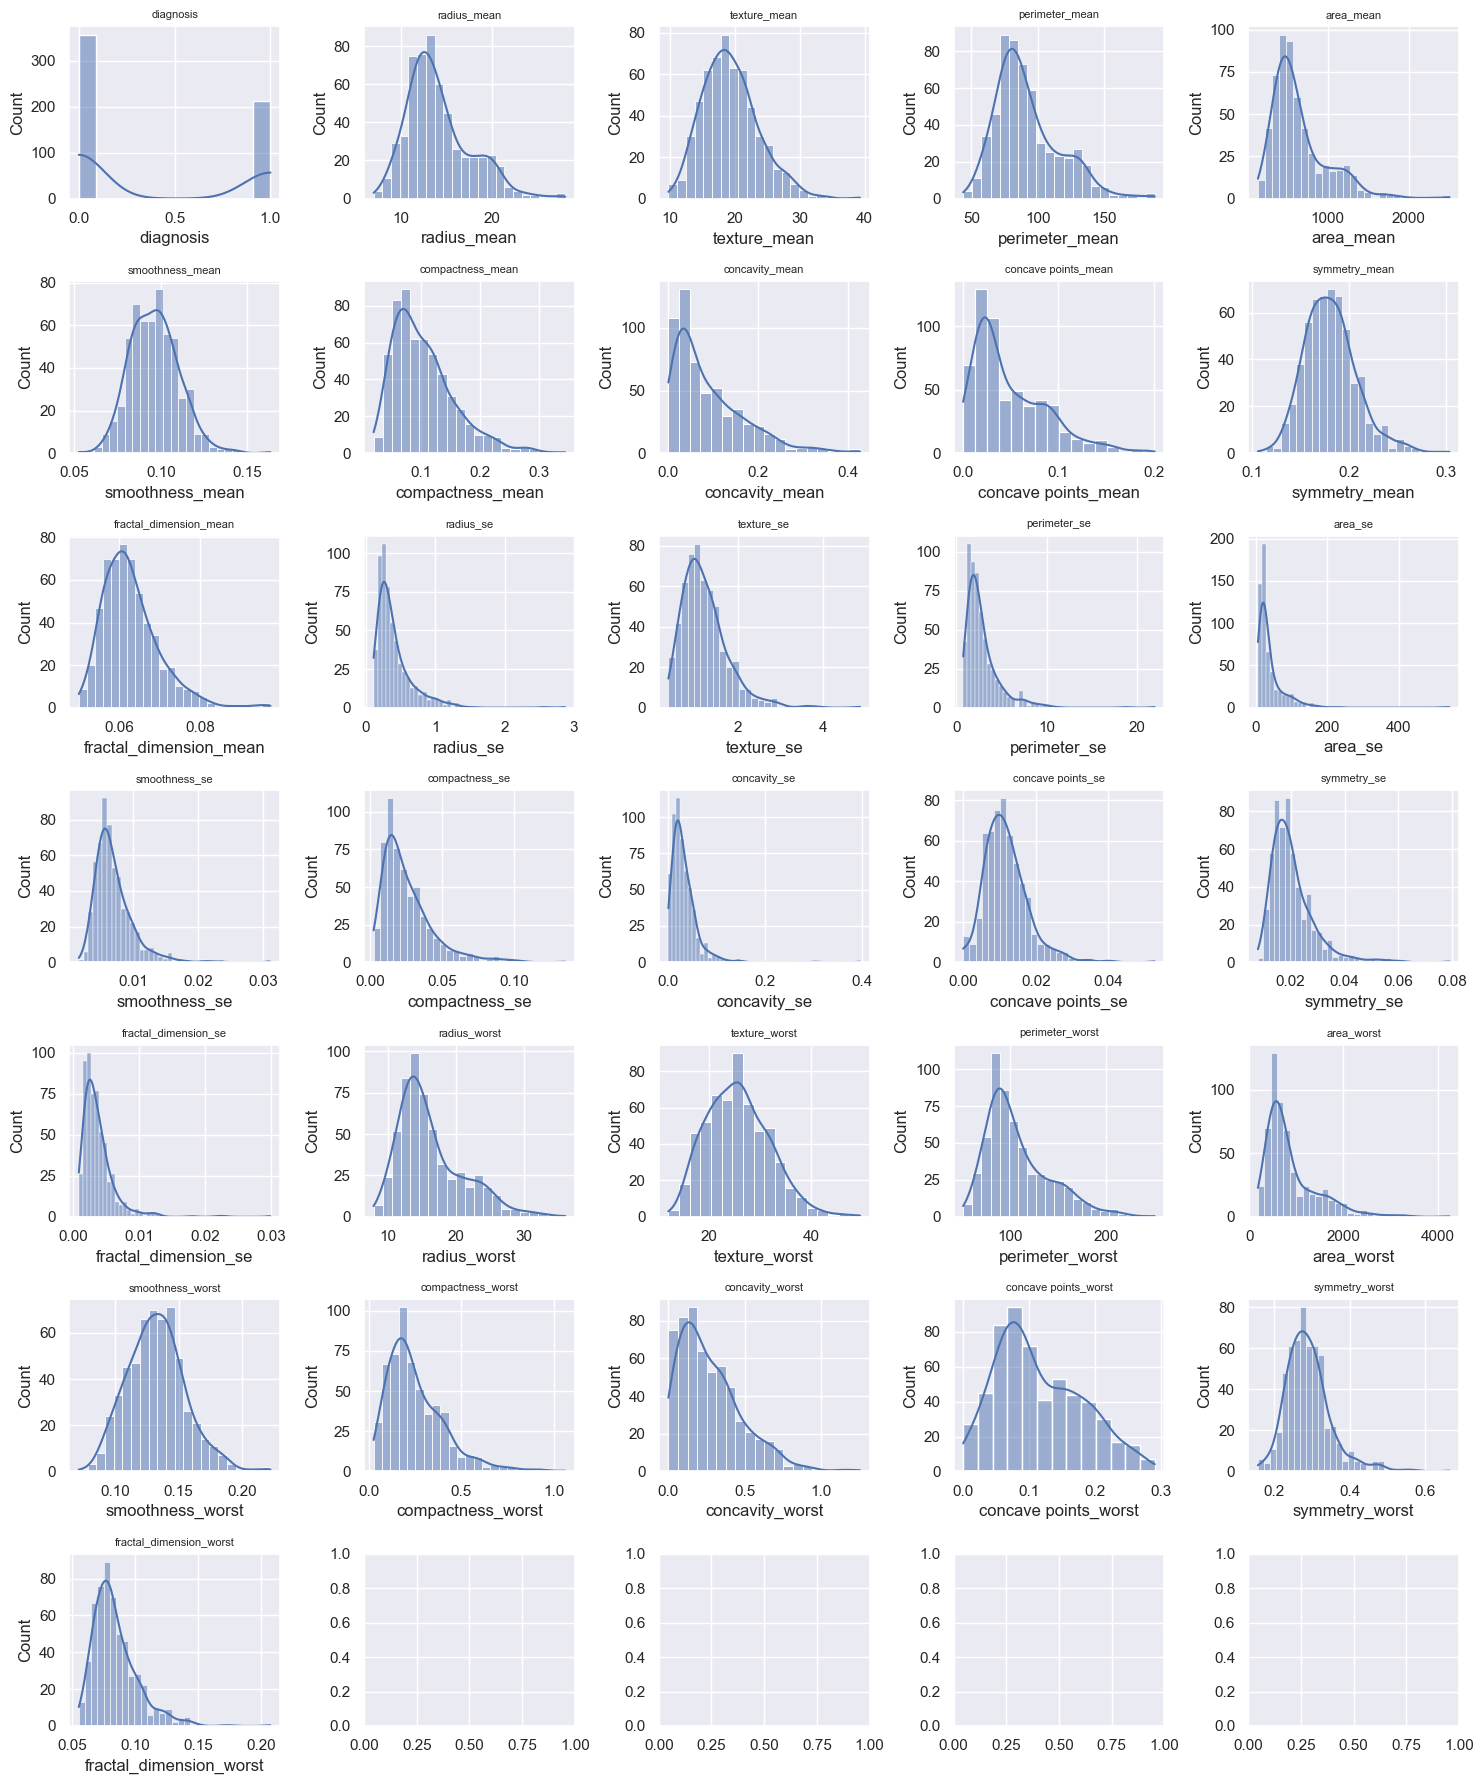

In [18]:
fig, axes = plt.subplots(7, 5, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col, fontsize=8)

plt.tight_layout()
plt.show()

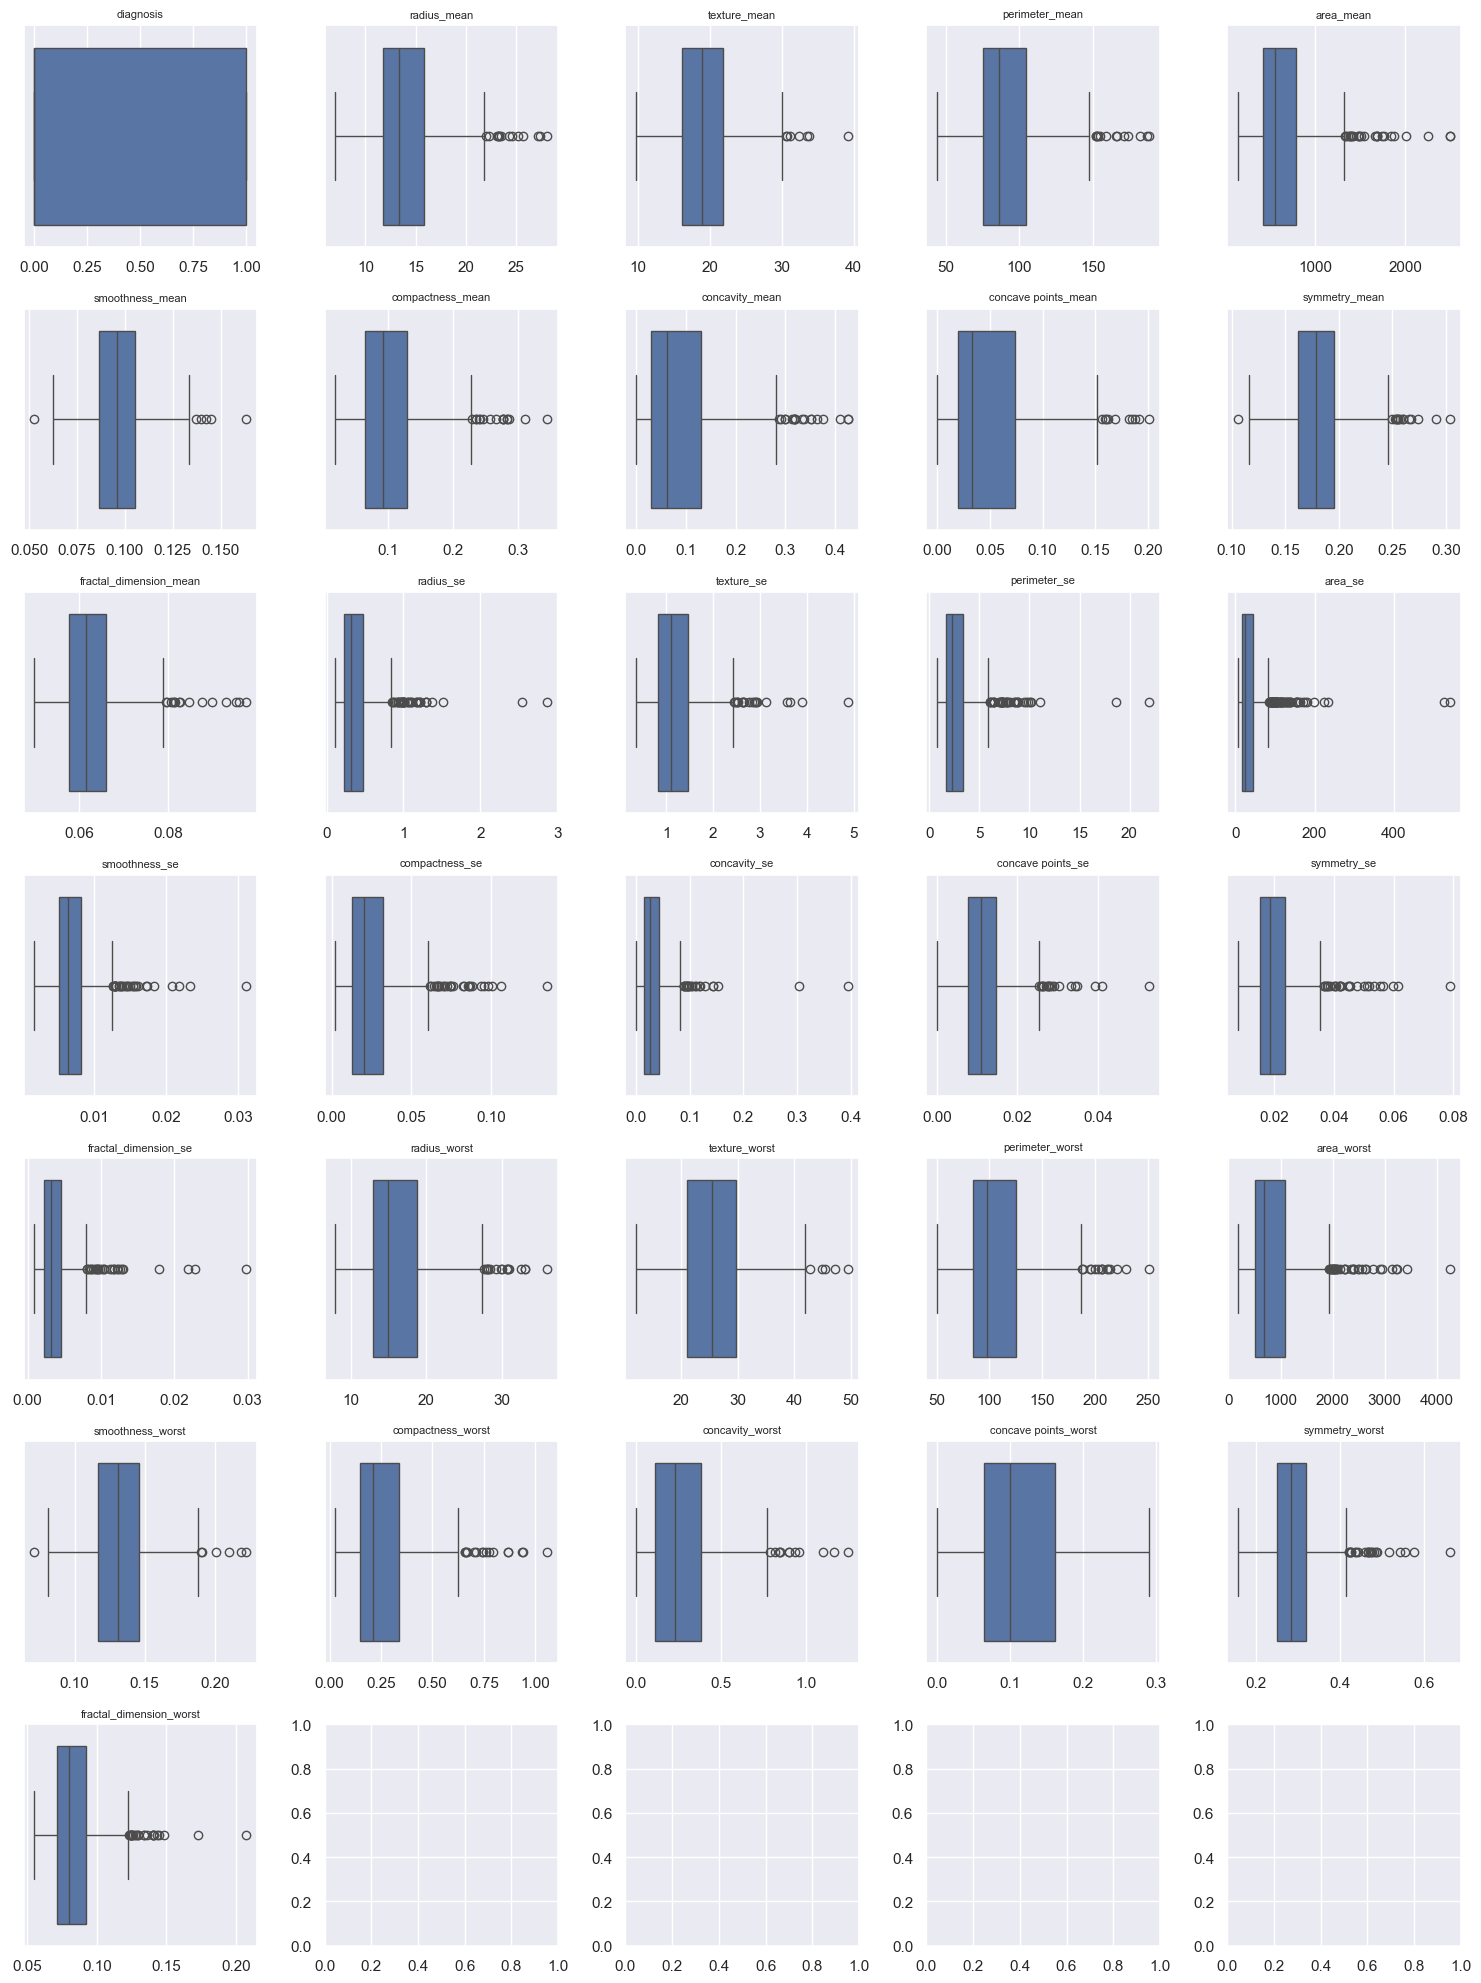

In [19]:
# outliers analysis

fig, axes = plt.subplots(7, 5, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=8)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

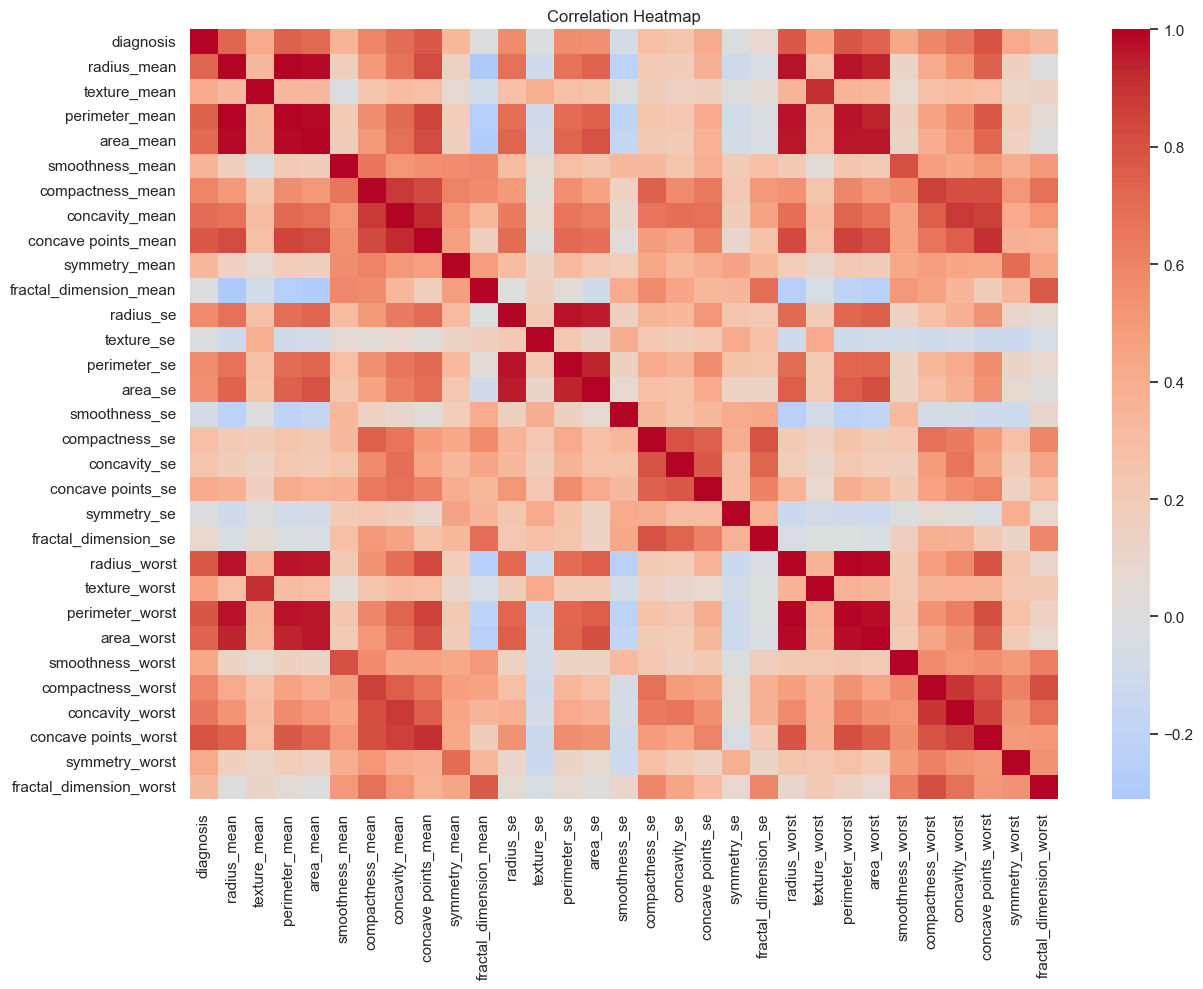

In [20]:
# identify the presence of highly correlated columns and feature relationships

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

**_Insights:_**
- **_Drop the id column_**
- **_All features are numerical, no categorical variables_**
- **_High-dimensional feature space_**
- **_No missing values_**
- **_Slight class imbalance, address after baseline using precision and recall_**
- **_Recall is the priority metric since false negatives are critical_**
- **_Strong separation in feature means between classes_**
- **_Extreme values often represent malignant cases, not noise_**
- **_Highly correlated features present. We can perform feature selection / PCA_**

#### **_Data Preprocessing_**

In [22]:
# separate data into features and target

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

In [23]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

In [24]:
print(f'Dataset size {X.shape}')
print(f'Train Dataset size {X_train.shape}')
print(f'Test Dataset size {X_test.shape}')

Dataset size (569, 30)
Train Dataset size (455, 30)
Test Dataset size (114, 30)


#### **_Baseline Model - Logistic Regression_**

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [29]:
# training accuracy

model.score(X_train_scaled, y_train)

0.9868131868131869

In [30]:
# test accuracy

model.score(X_test_scaled, y_test)

0.9649122807017544

#### **_Model Optimization_**

In [31]:
# pipeline creation

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA()),
        ("model", SVC(kernel="rbf"))
    ]
)

In [32]:
# grid of hyperparameters

param_grid = [
    {
        "pca__n_components": [10, 15, 20, 25, 30],
        "model__C": [0.1, 1, 10, 100, 1000],
        "model__gamma": [0.001, 0.01, 0.1, 1, "scale"]
    }
]

In [ ]:
# cross-validation setup (used inside grid search cv)

k=5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_STATE)

In [34]:
# hyperparameter tuning

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="recall",
    cv=skf,
    n_jobs=-1
)

In [35]:
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...del', SVC())])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'model__C': [0.1, 1, ...], 'model__gamma': [0.001, 0.01, ...], 'pca__n_components': [10, 15, ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold 

In [36]:
print("Hyperparameter Tuning result:")
print(f'Best params: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Hyperparameter Tuning result:
Best params: {'model__C': 10, 'model__gamma': 'scale', 'pca__n_components': 10}
Best score: 0.9647058823529411


#### **_Train with best params_**

In [37]:
best_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=10)),
        ("model", SVC(kernel="rbf", C=10, gamma="scale"))
    ]
)

In [38]:
best_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('pca', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",10
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'f

In [39]:
# training data predictions

y_train_pred = best_pipeline.predict(X_train)

In [40]:
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {round(train_acc*100, 2)} %")

Training Accuracy: 98.9 %


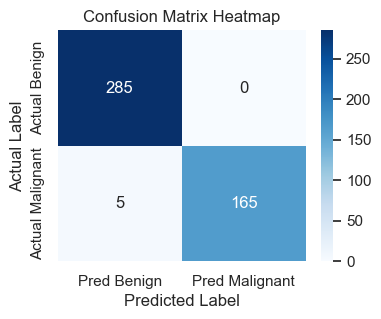

In [41]:
# confusion matrix

cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred Benign", "Pred Malignant"], yticklabels=["Actual Benign", "Actual Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [42]:
print("Training Classification report")
print(classification_report(y_train, y_train_pred))

Training Classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       1.00      0.97      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



In [43]:
# test data prediction

y_test_pred = best_pipeline.predict(X_test)

In [44]:
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {round(test_acc*100, 2)} %")

Test Accuracy: 96.49 %


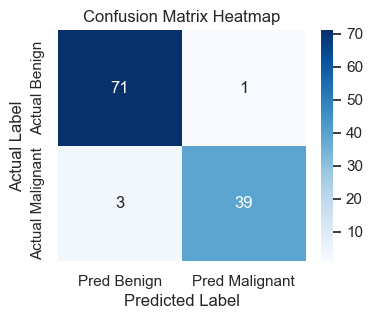

In [45]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred Benign", "Pred Malignant"], yticklabels=["Actual Benign", "Actual Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [46]:
print("Test Classification report")
print(classification_report(y_test, y_test_pred))

Test Classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### **_Build a predictive system_**

In [47]:
def predict_cancer(input_features):
    input_df = pd.DataFrame([input_features], columns=X_train.columns)
    prediction = best_pipeline.predict(input_df)
    print("Model prediction:", prediction)
    if prediction[0] == 1:
        print("Diagnosis - Malignant 🔴")
    else:
        print("Diagnosis - Benign 🟢")

In [48]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,11.410,10.820,73.340,403.300,0.094,0.067,0.035,0.026,0.167,0.061,0.141,0.461,1.103,10.500,0.006,0.015,0.015,0.006,0.013,0.002,12.820,15.970,83.740,510.500,0.155,0.239,0.210,0.090,0.302,0.085
250,20.940,23.560,138.900,1364.000,0.101,0.161,0.271,0.131,0.221,0.059,1.004,0.821,6.372,137.900,0.005,0.039,0.095,0.019,0.024,0.005,25.580,27.000,165.300,2010.000,0.121,0.317,0.699,0.210,0.313,0.078
375,16.170,16.070,106.300,788.500,0.099,0.144,0.067,0.054,0.199,0.066,0.174,0.489,1.349,14.910,0.005,0.018,0.020,0.012,0.019,0.004,16.970,19.140,113.100,861.500,0.123,0.255,0.211,0.125,0.315,0.090
99,14.420,19.770,94.480,642.500,0.098,0.114,0.094,0.058,0.188,0.064,0.289,1.851,2.376,26.850,0.008,0.029,0.033,0.014,0.015,0.004,16.330,30.860,109.500,826.400,0.143,0.303,0.319,0.157,0.272,0.094
455,13.380,30.720,86.340,557.200,0.092,0.074,0.028,0.033,0.138,0.060,0.341,1.924,2.287,28.930,0.006,0.012,0.008,0.009,0.016,0.003,15.050,41.610,96.690,705.600,0.117,0.142,0.070,0.078,0.220,0.077


In [49]:
y_test.head()

120    0
250    1
375    0
99     1
455    0
Name: diagnosis, dtype: int64

In [50]:
# sample unknown data point - access from test data index

test_1 = X_test.loc[120].tolist()
print(test_1)

[11.41, 10.82, 73.34, 403.3, 0.09373, 0.06685, 0.03512, 0.02623, 0.1667, 0.06113, 0.1408, 0.4607, 1.103, 10.5, 0.00604, 0.01529, 0.01514, 0.00646, 0.01344, 0.002206, 12.82, 15.97, 83.74, 510.5, 0.1548, 0.239, 0.2102, 0.08958, 0.3016, 0.08523]


In [51]:
predict_cancer(test_1)

Model prediction: [0]
Diagnosis - Benign 🟢


In [52]:
# sample unknown data point - access from test data index

test_2 = X_test.loc[250].tolist()
print(test_2)

[20.94, 23.56, 138.9, 1364.0, 0.1007, 0.1606, 0.2712, 0.131, 0.2205, 0.05898, 1.004, 0.8208, 6.372, 137.9, 0.005283, 0.03908, 0.09518, 0.01864, 0.02401, 0.005002, 25.58, 27.0, 165.3, 2010.0, 0.1211, 0.3172, 0.6991, 0.2105, 0.3126, 0.07849]


In [53]:
predict_cancer(test_2)

Model prediction: [1]
Diagnosis - Malignant 🔴


In [54]:
test_3 = [16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.187,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.0146,0.003042,19.19,33.88,123.8,1150,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452]
predict_cancer(test_3)

Model prediction: [1]
Diagnosis - Malignant 🔴
